In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import (StandardScaler,MinMaxScaler)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
df = pd.read_csv('/content/sample_data/new cpd.csv', encoding = 'unicode_escape')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Types
0,0,P1,33,1,2,4,5,4,3,2,...,4,2,2,3,1,2,3,4,Low,Small Cell
1,1,P10,17,1,3,1,5,3,4,2,...,3,7,8,6,2,1,7,2,Medium,Small Cell
2,2,P100,35,1,4,5,6,5,5,4,...,7,9,2,1,4,6,7,2,High,Non-Small Cell
3,3,P1000,37,1,7,7,7,7,6,7,...,2,3,1,4,5,6,7,5,High,Non-Small Cell
4,4,P101,46,1,6,8,7,7,7,6,...,2,4,1,4,2,4,2,3,High,Non-Small Cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,3,2,7,8,2,4,5,3,High,Small Cell
996,996,P996,37,2,6,8,7,7,7,6,...,6,5,7,2,4,3,1,4,High,Non-Small Cell
997,997,P997,25,2,4,5,6,5,5,4,...,7,9,2,1,4,6,7,2,High,Non-Small Cell
998,998,P998,18,2,6,8,7,7,7,6,...,2,4,1,4,2,4,2,3,High,Small Cell


In [ ]:
column_to_drop = 'index'
df.drop(column_to_drop, axis=1, inplace=True)

In [ ]:
df.shape

(1000, 26)

In [ ]:
df.info() #information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [ ]:
df.isnull().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
Types                       0
dtype: int64

In [ ]:
df["Level"].value_counts()

0    365
2    332
1    303
Name: Level, dtype: int64

In [ ]:
#checking categorical feature
print(df.select_dtypes(include=['object']).columns.tolist())

#checking numerical features
print(df.select_dtypes(exclude=['object']).columns.tolist())

['Patient Id', 'Level', 'Types']
['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring']


In [ ]:
categorical_cols = ['Patient Id', 'Level', 'Types']
numerical_cols = ['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring']

In [ ]:
label_encoder = preprocessing.LabelEncoder()

for i in range(0,len(categorical_cols)):
 df[categorical_cols[i]] = label_encoder.fit_transform(df[categorical_cols[i]])
 df[categorical_cols[i]].unique()

In [ ]:
#Label Encoding

le = LabelEncoder()

df[categorical_cols] = df[categorical_cols].apply(le.fit_transform)
df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Types
0,0,33,1,2,4,5,4,3,2,2,...,4,2,2,3,1,2,3,4,1,1
1,1,17,1,3,1,5,3,4,2,2,...,3,7,8,6,2,1,7,2,2,1
2,2,35,1,4,5,6,5,5,4,6,...,7,9,2,1,4,6,7,2,0,0
3,3,37,1,7,7,7,7,6,7,7,...,2,3,1,4,5,6,7,5,0,0
4,4,46,1,6,8,7,7,7,6,7,...,2,4,1,4,2,4,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,44,1,6,7,7,7,7,6,7,...,3,2,7,8,2,4,5,3,0,1
996,996,37,2,6,8,7,7,7,6,7,...,6,5,7,2,4,3,1,4,0,0
997,997,25,2,4,5,6,5,5,4,6,...,7,9,2,1,4,6,7,2,0,0
998,998,18,2,6,8,7,7,7,6,7,...,2,4,1,4,2,4,2,3,0,1


In [ ]:
#specifying X and y

X = df.drop(['Level'],axis=1)
y = df.Level
X.shape, y.shape

((1000, 25), (1000,))

In [ ]:
y.value_counts()

0    365
2    332
1    303
Name: Level, dtype: int64

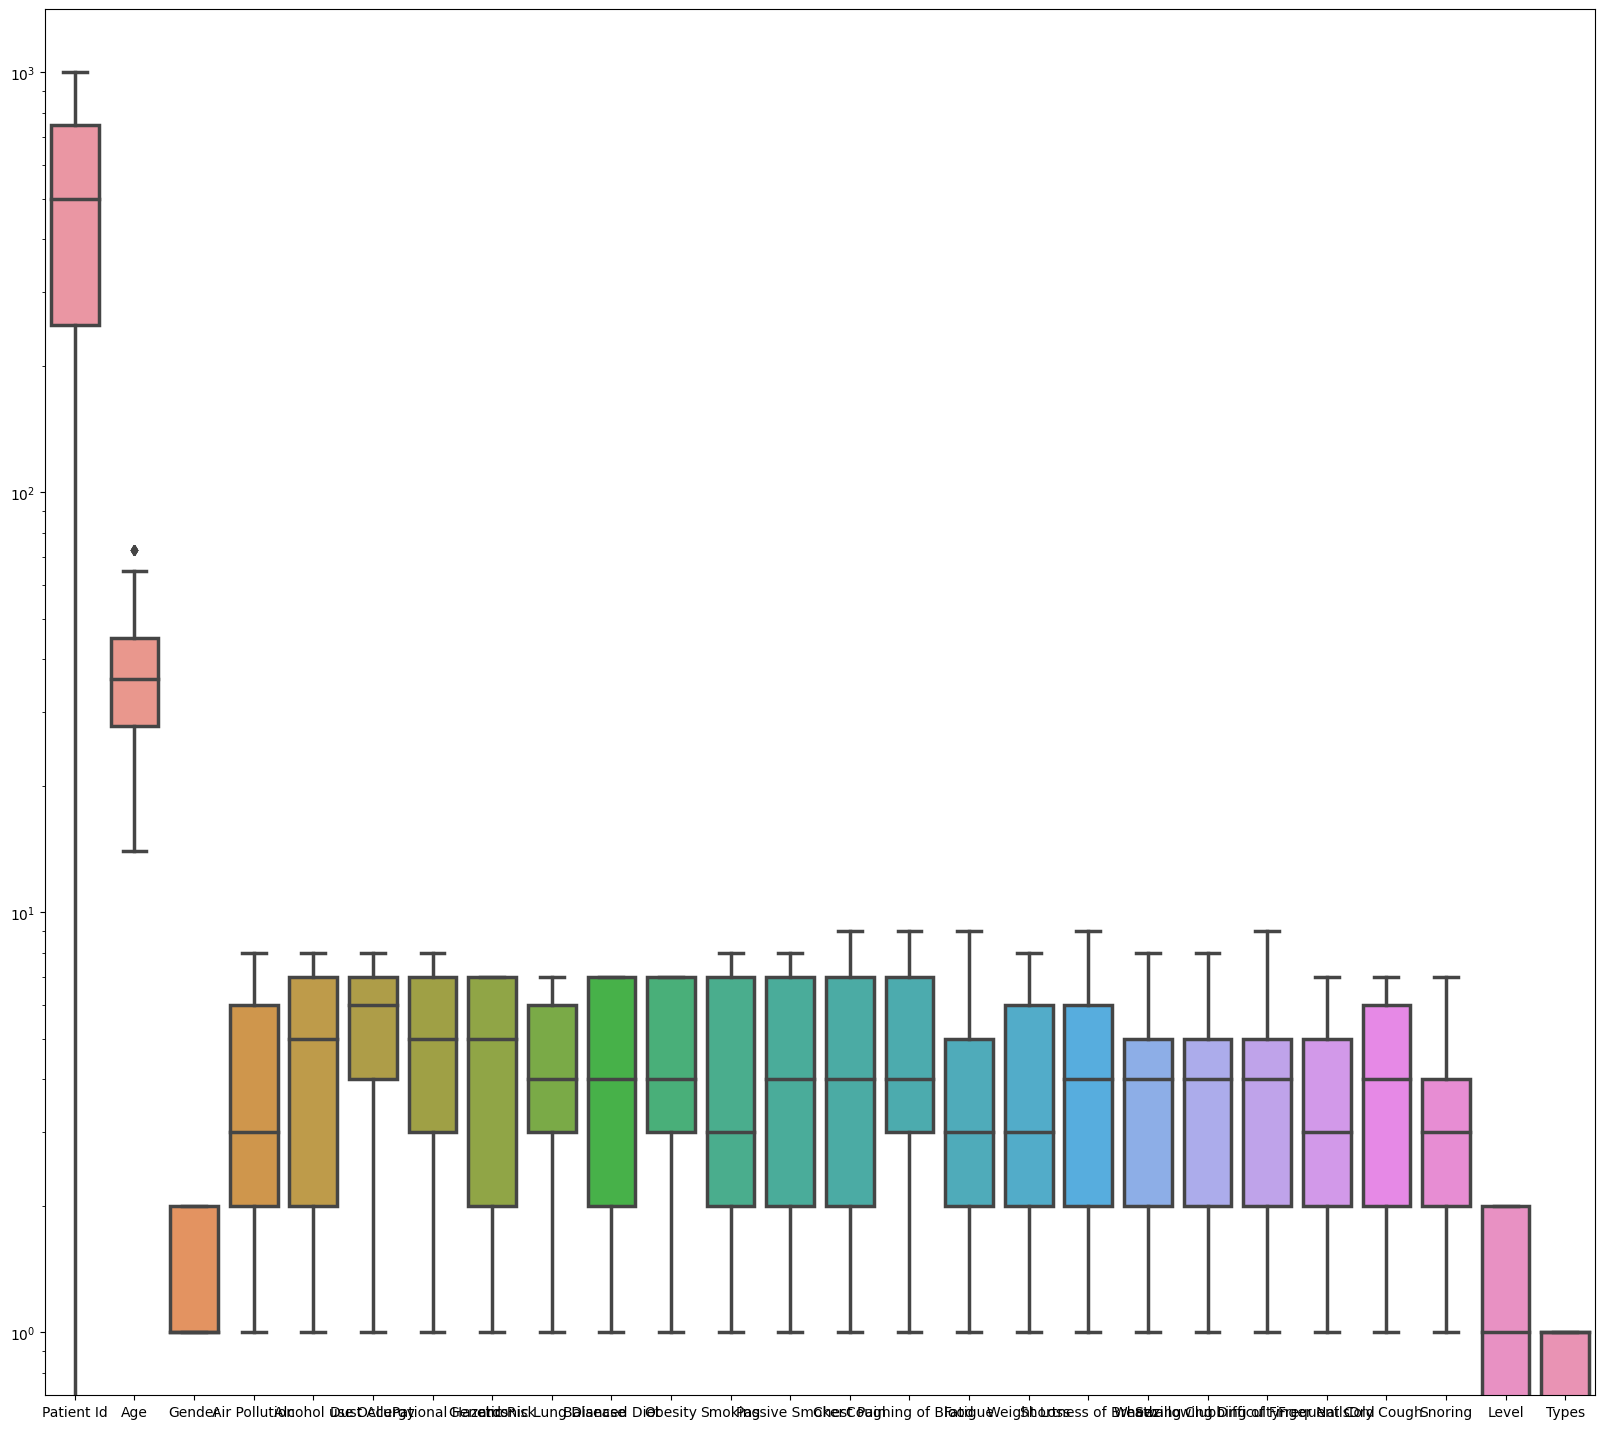

In [ ]:
# To check outliers
import matplotlib.pyplot as plt

a4_dims = (20, 18)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=df, linewidth=2.5,ax=ax)
g.set_yscale("log")

<Axes: xlabel='Level'>

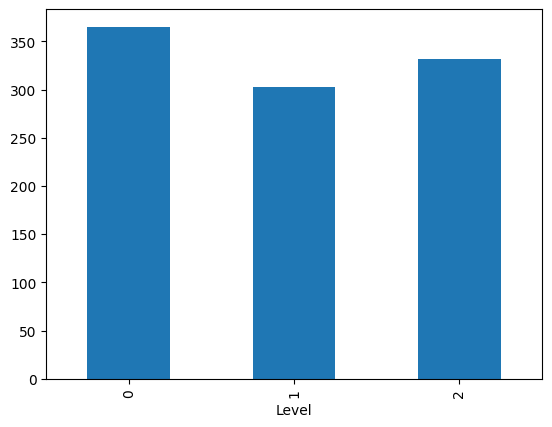

In [ ]:
df.pivot_table(index='Level', aggfunc='size').plot(kind='bar')   #plotting bar chart for label

In [ ]:
#normalization of the dataset

from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X = std.fit_transform(X)
std_df = pd.DataFrame(X)
std_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.730320,-0.347848,-0.819903,-0.906679,-0.214954,-0.083340,-0.398718,-0.743202,-1.288162,-1.167040,...,-0.381548,0.065746,-0.980760,-0.870694,-0.328743,-1.224625,-0.838618,-0.418550,0.728655,0.980196
1,-1.726856,-1.681238,-0.819903,-0.413919,-1.360357,-0.083340,-0.873383,-0.272821,-1.288162,-1.167040,...,-1.273014,-0.387677,1.208436,2.069186,0.993281,-0.805663,-1.384593,1.544171,-0.628245,0.980196
2,-1.723391,-0.181174,-0.819903,0.078842,0.166847,0.421751,0.075946,0.197560,-0.205673,0.706970,...,1.847119,1.426018,2.084114,-0.870694,-1.210093,0.032260,1.345283,1.544171,-0.628245,-1.020204
3,-1.719927,-0.014501,-0.819903,1.557123,0.930449,0.926842,1.025275,0.667941,1.418061,1.175473,...,0.064186,-0.841101,-0.542921,-1.360675,0.111931,0.451222,1.345283,1.544171,1.407105,-1.020204
4,-1.716463,0.735531,-0.819903,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,...,-0.381548,-0.841101,-0.105081,-1.360675,0.111931,-0.805663,0.253332,-0.909231,0.050205,-1.020204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.716463,0.568858,-0.819903,1.064362,0.930449,0.926842,1.025275,1.138323,0.876816,1.175473,...,0.509919,-0.387677,-0.980760,1.579206,1.874630,-0.805663,0.253332,0.562810,0.050205,0.980196
996,1.719927,-0.014501,1.219657,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,...,2.292852,0.972594,0.332758,1.579206,-0.769418,0.032260,-0.292643,-1.399911,0.728655,-1.020204
997,1.723391,-1.014543,1.219657,0.078842,0.166847,0.421751,0.075946,0.197560,-0.205673,0.706970,...,1.847119,1.426018,2.084114,-0.870694,-1.210093,0.032260,1.345283,1.544171,-0.628245,-1.020204
998,1.726856,-1.597901,1.219657,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,...,-0.381548,-0.841101,-0.105081,-1.360675,0.111931,-0.805663,0.253332,-0.909231,0.050205,0.980196


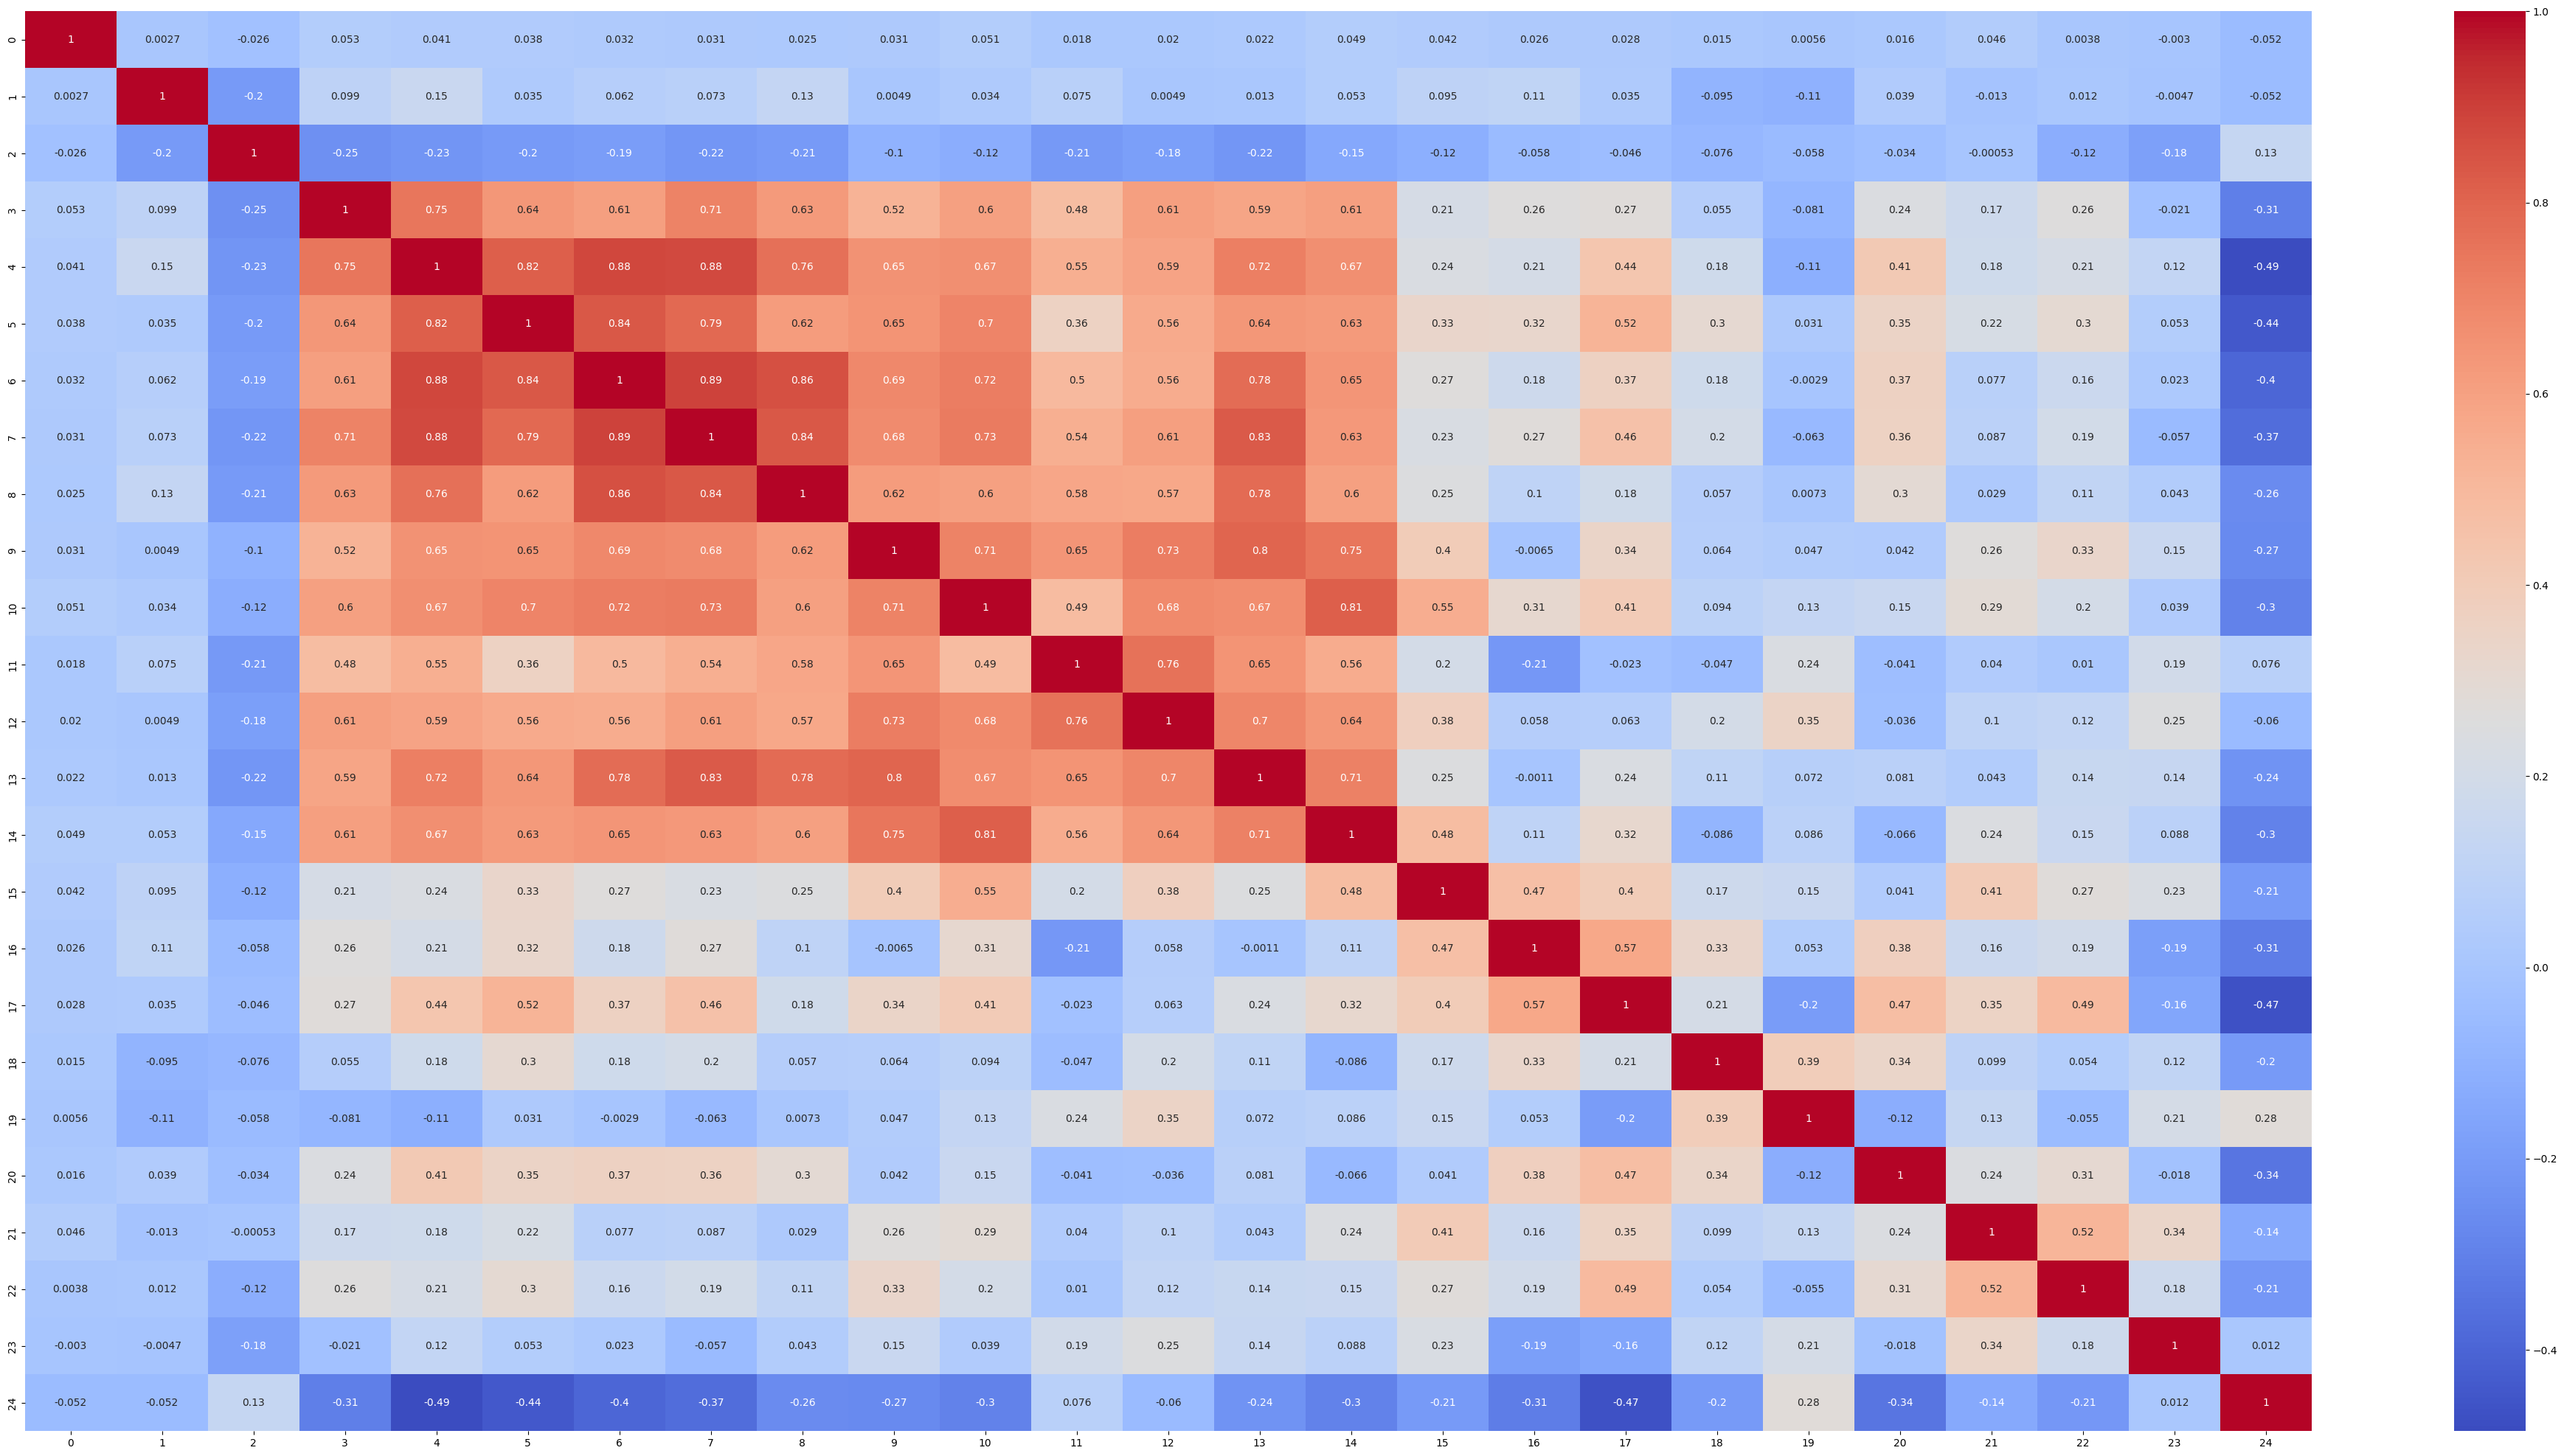

In [ ]:
plt.figure(figsize=(50,25))
sns.heatmap(std_df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [ ]:
#splitting the dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(700, 25)
(700,)
(300, 25)


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
import numpy as np

In [ ]:
# Define list of classifiers to use
classifiers = [GaussianNB(),
               BernoulliNB(),]

In [ ]:
# Define lists to store evaluation metrics
confusion_matrices = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
kfold_accuracy_scores = []

# Define k for k-fold cross-validation
k = 3

# Loop through each classifier and calculate evaluation metrics
for clf1 in classifiers:
    # Calculate cross-validation accuracy score
    cv_scores = cross_val_score(clf1, X_train, y_train, cv=k)
    kfold_accuracy_scores.append(cv_scores.mean())

    # Fit classifier to train set and make predictions on test set
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_test)

    # Calculate evaluation metrics
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Print evaluation metrics for each classifier
for i in range(len(classifiers)):
    print("Classifier:", type(classifiers[i]).__name__)
    print("Confusion Matrix:\n", confusion_matrices[i])
    print("Accuracy Score:", accuracy_scores[i])
    print("Precision Score:", precision_scores[i])
    print("Recall Score:", recall_scores[i])
    print("F1 Score:", f1_scores[i])
    print("K-Fold Accuracy Score: %.2f%% (+/- %.2f%%)" % (np.mean(kfold_accuracy_scores[i]) * 100, np.std(kfold_accuracy_scores[i]) * 100))
    print("Classification Report:\n", classification_report(y_test, classifiers[i].predict(X_test)))
    print("\n")

Classifier: GaussianNB
Confusion Matrix:
 [[99  0  9]
 [ 4 87  8]
 [11  0 82]]
Accuracy Score: 0.8933333333333333
Precision Score: 0.8993992557150451
Recall Score: 0.8933333333333333
F1 Score: 0.8945824251671024
K-Fold Accuracy Score: 89.57% (+/- 0.00%)
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       108
           1       1.00      0.88      0.94        99
           2       0.83      0.88      0.85        93

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300



Classifier: BernoulliNB
Confusion Matrix:
 [[104   0   4]
 [  4  89   6]
 [ 13  23  57]]
Accuracy Score: 0.8333333333333334
Precision Score: 0.8353849737440306
Recall Score: 0.8333333333333334
F1 Score: 0.8262505251557359
K-Fold Accuracy Score: 84.43% (+/- 0.00%)
Classification Report:
               precision    recall  f1-score   suppo

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = clf1.predict(X_test)
cm1 = confusion_matrix(y_test , y_pred)
cm1

array([[104,   0,   4],
       [  4,  89,   6],
       [ 13,  23,  57]])

Text(33.22222222222222, 0.5, 'Truth')

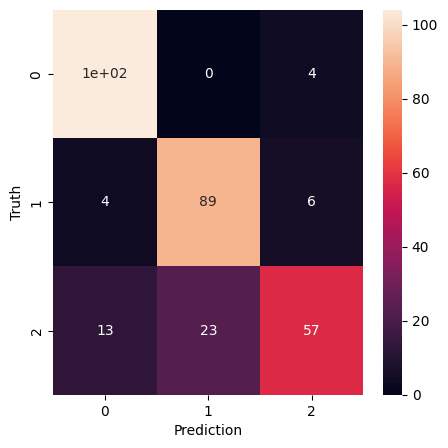

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm1, annot = True)
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [ ]:
df["Types"].value_counts()

1    510
0    490
Name: Types, dtype: int64

In [ ]:
#specifying X and y

X = df.drop(['Types'],axis=1)
y = df.Types
X.shape, y.shape

((1000, 25), (1000,))

In [ ]:
y.value_counts()

1    510
0    490
Name: Types, dtype: int64

<Axes: xlabel='Types'>

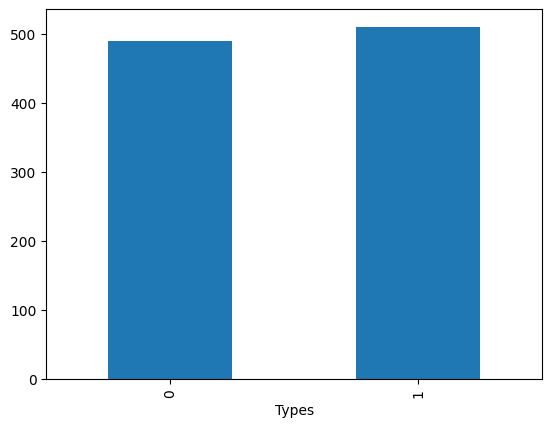

In [ ]:
df.pivot_table(index='Types', aggfunc='size').plot(kind='bar')   #plotting bar chart for label

In [ ]:
#splitting the dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(700, 25)
(700,)
(300, 25)


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
import numpy as np

In [ ]:
# Define list of classifiers to use
classifiers = [LogisticRegression()]

In [ ]:
# Define lists to store evaluation metrics
confusion_matrices = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
kfold_accuracy_scores = []

# Define k for k-fold cross-validation
k = 3

# Loop through each classifier and calculate evaluation metrics
for LR in classifiers:
    # Calculate cross-validation accuracy score
    cv_scores = cross_val_score(LR, X_train, y_train, cv=k)
    kfold_accuracy_scores.append(cv_scores.mean())

    # Fit classifier to train set and make predictions on test set
    LR.fit(X_train, y_train)
    y_pred = LR.predict(X_test)

    # Calculate evaluation metrics
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))


# Print evaluation metrics for each classifier
for i in range(len(classifiers)):
    print("Classifier:", type(classifiers[i]).__name__)
    print("Confusion Matrix:\n", confusion_matrices[i])
    print("Accuracy Score:", accuracy_scores[i])
    print("Precision Score:", precision_scores[i])
    print("Recall Score:", recall_scores[i])
    print("F1 Score:", f1_scores[i])
    print("K-Fold Accuracy Score: %.2f%% (+/- %.2f%%)" % (np.mean(kfold_accuracy_scores[i]) * 100, np.std(kfold_accuracy_scores[i]) * 100))
    print("Classification Report:\n", classification_report(y_test, classifiers[i].predict(X_test)))
    print("\n")

Classifier: LogisticRegression
Confusion Matrix:
 [[106  26]
 [ 24 144]]
Accuracy Score: 0.8333333333333334
Precision Score: 0.8331221719457014
Recall Score: 0.8333333333333334
F1 Score: 0.8331902976647545
K-Fold Accuracy Score: 85.00% (+/- 0.00%)
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       132
           1       0.85      0.86      0.85       168

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = LR.predict(X_test)
cm = confusion_matrix(y_test , y_pred)
cm

array([[106,  26],
       [ 24, 144]])

Text(33.22222222222222, 0.5, 'Truth')

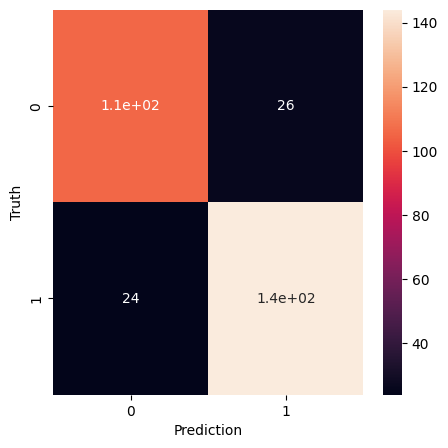

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot = True)
plt.xlabel('Prediction')
plt.ylabel('Truth')